# Random module

In [1]:
import random

print("random() : ", random.random())

random() :  0.9102514320018852


In [2]:
print("choice([1, 2, 3, 4, 5, 9]) : ", random.choice([1, 2, 3, 4, 5, 9]))

choice([1, 2, 3, 4, 5, 9]) :  3


In [3]:
print("choice([1, 2, 3, 4, 5, 9]) : ", random.choice([1, 2, 3, 4, 5, 9]))

choice([1, 2, 3, 4, 5, 9]) :  5


In [5]:
random.randrange(100, 1000, 2) # 100 ile 1000 arasında 2şer 2şer giden sayılardan seçer

920

In [6]:
random.randrange(100, 1000, 3) # 100 ile 1000 arasında 3er 3er giden sayılardan seçer

439

---

### seed([x])

The method seed() sets the integer starting value used in generating random numbers. Call this function before calling any other random module function.

In [7]:
random.seed(10)
print("Random number with seed 10 : ", random.random())

Random number with seed 10 :  0.5714025946899135


In [8]:
random.seed(10)
print("Random number with seed 10 : ", random.random())

Random number with seed 10 :  0.5714025946899135


---

### shuffle(list)

Verilen listeyi karıştırır.

In [10]:
list = [20, 16, 10, 5]
random.shuffle(list)
list

[20, 10, 5, 16]

In [11]:
random.shuffle(list)
list

[10, 20, 16, 5]

---

### uniform(x, y)

The method uniform() returns a random float r, such that x is less than or equal to r and r is less than y.

In [12]:
random.uniform(5, 10)

5.17201786937823

In [13]:
random.uniform(7, 14)

10.430599073278977

In [14]:
int(random.uniform(7, 14))

7

---

# Random vectors & matrices

In [15]:
import numpy as np

a = np.random.rand(3, 3)
a

array([[0.32898421, 0.36905087, 0.42362543],
       [0.38094508, 0.5152688 , 0.65777255],
       [0.80875884, 0.88434786, 0.34458441]])

---

# Exercise 1-1

* Solution 1 

In [16]:
from random import random

all = eval(input("How many points?... "))

inside = 0

for i in range(all):
    x, y = random(), random()
    if(x**2 + y**2)**(0.5) < 1 : inside = inside + 1

mypi = 4.0 * (float(inside)/all)
print("The value of pi for %d points is %f"%(all, mypi))

How many points?...  10000


The value of pi for 10000 points is 3.149600


* Solution 1 with time measurement

In [19]:
from random import random
import time

all = eval(input("How many points?... "))

starttime = time.perf_counter()
inside = 0

for i in range(all):
    x, y = random(), random()
    if(x**2 + y**2)**(0.5) < 1: inside += 1
    
mypi = 4.0 * (float(inside)/all)

elapsedtime = (time.perf_counter() - starttime)
print("The value of pi for %d points is %f and the time is %f seconds"%(all, mypi, elapsedtime))

How many points?...  10000


The value of pi for 10000 points is 3.150400 and the time is 0.016482 seconds


* Solution 2

In [1]:
import numpy as np
import time

all = eval(input("How many points?... "))

starttime = time.perf_counter()
inside = 0

x = np.random.rand(all)
y = np.random.rand(all)

for i in range(all):
    if(x[i]**2 + y[i]**2)**(0.5) < 1: inside -= -1
        
mypi = 4.0 * (float(inside)/all)

elapsedtime = (time.perf_counter() - starttime)
print("The value of pi for %d points is %f and the time is %f seconds"%(all, mypi, elapsedtime))

How many points?...  10000


The value of pi for 10000 points is 3.163600 and the time is 0.093768 seconds


* Solution 2 with vectorization

In [1]:
import numpy as np
from time import perf_counter

all = eval(input("How many points?... "))

starttime = perf_counter()
inside = 0

x = np.random.rand(all)
y = np.random.rand(all)

inside = np.where((x**2 + y**2)**(0.5) < 1,1,0).sum()

mypi = 4.0*(inside/all)

elapsedtime = (perf_counter() - starttime)
print("The value of pi for %d points is %f and the time is %f seconds"%(all, mypi, elapsedtime))

How many points?...  10000


The value of pi for 10000 points is 3.168400 and the time is 0.004465 seconds


---

# Exercise 1-2

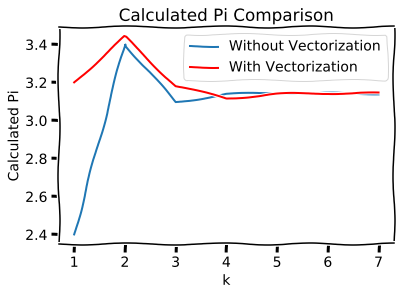

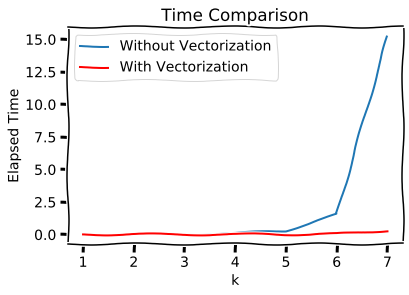

In [9]:
import numpy as np
import time
import matplotlib.pyplot as plt

def withoutVectorization(all):
    starttime = time.perf_counter()
    inside = 0

    x = np.random.rand(all)
    y = np.random.rand(all)

    for i in range(all):
        if(x[i]**2 + y[i]**2)**(0.5) < 1: inside -= -1

    mypi = 4.0 * (float(inside)/all)

    elapsedtime = (time.perf_counter() - starttime)
    return mypi, elapsedtime

def withVectorization(all):
    starttime = perf_counter()
    inside = 0

    x = np.random.rand(all)
    y = np.random.rand(all)

    inside = np.where((x**2 + y**2)**(0.5) < 1,1,0).sum()

    mypi = 4.0*(inside/all)

    elapsedtime = (perf_counter() - starttime)
    return mypi, elapsedtime

calcpi1 = []
mytime1 = []

for i in range(0, 7):
    tempcalcpi, tempmytime = withoutVectorization(10**(i+1))
    calcpi1.append(tempcalcpi)
    mytime1.append(tempmytime)
    
calcpi2 = []
mytime2 = []
    
for i in range(0, 7):
    tempcalcpi, tempmytime = withVectorization(10**(i+1))
    calcpi2.append(tempcalcpi)
    mytime2.append(tempmytime)

xaxis = range(1, 8)

plt.plot(xaxis, calcpi1, label = 'Without Vectorization')
plt.plot(xaxis, calcpi2, label = 'With Vectorization', color = 'r')
plt.xlabel('k')
plt.ylabel('Calculated Pi')
plt.title('Calculated Pi Comparison')
plt.legend()
plt.show()

plt.plot(xaxis, mytime1, label = 'Without Vectorization')
plt.plot(xaxis, mytime2, label = 'With Vectorization', color = 'r')
plt.xlabel('k')
plt.ylabel('Elapsed Time')
plt.title('Time Comparison')
plt.legend()
plt.show()

---

# Exercise 2

In [30]:
import random
import string

letters = string.ascii_lowercase
count = 0
a = 0

while a == 0:
    if ''.join(random.choice(letters) for i in range (5)) == 'berat': 
        print("It took %d monkeys to write berat."%(count))
        a = 1
    else: 
        count += 1

It took 5029297 monkeys to write berat.


---

# Exercise 3

In [29]:
import random

def rollDice(times = 3):
    x = []
    for i in range(times):
        x.append(random.choice([-4, -3, -1, 1, 2, 4]))
    return x

counter = 0
winner = False

print("Ladies goes first so Angelica starts the game.")

while winner != True:
    counter += 1
    numbers = rollDice()
    if sum(numbers) == 0:
        winner = True
        if counter%2 == 0:
            print("Brad wins the game after %d rolls."%(counter))
        else:
            print("Angelica wins the game after %d rolls."%(counter))
    else:
        pass

Ladies goes first so Angelica starts the game.
Brad wins the game after 12 rolls.
